In [166]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf

%matplotlib inline

In [167]:
 # Set the random seed for reproducibility
from numpy.random import seed
seed(1)

from tensorflow import random
random.set_seed(2)

In [168]:
file_path = Path("C:\\Users\\Zach.000\\Documents\\SMUFinTech\\GitHub\\Portfolio\\project-3\\Resources\\elonmusk_tweets_hourly_price.csv")
df_tweet = pd.read_csv(file_path)
df_tweet.head(75)

,date only,hour,Close,hourly return,tick,text,Subjectivity,Polarity,Analysis,date_x,date_y
0,2020-10-12,18,NaN,NaN,NaN,good grief! spacex is getting zero money for t...,0.475000,-0.100000,Negative,2020-10-12 18:58:32-05:00,NaN
1,2020-10-12,16,NaN,NaN,NaN,"with fsd, we got stuck in a lot of local maxim...",0.306349,0.128571,Positive,2020-10-12 16:23:59-05:00,NaN
2,2020-10-12,16,NaN,NaN,NaN,"thank you, much more accurate haha",0.477778,0.366667,Positive,2020-10-12 16:20:01-05:00,NaN
3,2020-10-12,16,NaN,NaN,NaN,this graph appears to be upside down,0.288889,-0.155556,Negative,2020-10-12 16:11:19-05:00,NaN
4,2020-10-12,15,NaN,NaN,NaN,sheer magnitude of the entire production syste...,0.652778,0.026389,Positive,2020-10-12 15:29:44-05:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
70,2020-10-07,10,422.802399,0.006924,1.0,"prototypes are a piece of cake, but high volum...",0.539697,0.001861,Positive,2020-10-07 10:02:17-05:00,2020-10-07 10:30:00-05:00
71,2020-10-07,9,419.894989,0.013142,1.0,we do expect to make heavy use of lfp for medi...,0.500000,-0.200000,Negative,2020-10-07 09:55:28-05:00,2020-10-07 09:30:00-05:00
72,2020-10-07,9,419.894989,0.013142,1.0,berlin will use 4680 cell with structural batt...,0.490584,0.142532,Positive,2020-10-07 09:53:15-05:00,2020-10-07 09:30:00-05:00
73,2020-10-07,9,419.894989,0.013142,1.0,they are,0.000000,0.000000,Neutral,2020-10-07 09:37:49-05:00,2020-10-07 09:30:00-05:00


In [169]:
df_tweet.dropna(inplace=True)
df_tweet.head()

,date only,hour,Close,hourly return,tick,text,Subjectivity,Polarity,Analysis,date_x,date_y
41,2020-10-08,14,425.920013,-0.004204,0.0,meant to say that it should be fixed in the la...,0.500000,0.166667,Positive,2020-10-08 14:33:47-05:00,2020-10-08 14:30:00-05:00
42,2020-10-08,14,425.920013,-0.004204,0.0,it should be,0.000000,0.000000,Neutral,2020-10-08 14:32:53-05:00,2020-10-08 14:30:00-05:00
43,2020-10-08,14,425.920013,-0.004204,0.0,exactly. we barked up that tree for way too lo...,0.438068,-0.070455,Negative,2020-10-08 14:18:15-05:00,2020-10-08 14:30:00-05:00
44,2020-10-08,14,425.920013,-0.004204,0.0,"yes, we will play sexy snake jazz",1.000000,0.500000,Positive,2020-10-08 14:07:41-05:00,2020-10-08 14:30:00-05:00
45,2020-10-08,14,425.920013,-0.004204,0.0,"yeah, provided we do our metal gear snake auto...",0.000000,0.000000,Neutral,2020-10-08 14:03:47-05:00,2020-10-08 14:30:00-05:00


In [207]:
df_tweet.shape

(586, 11)

In [171]:
 # Create the features set (X) and the target vector (y)
X = df_tweet["text"].values
y = df_tweet["tick"].values

In [172]:
 # Import the Tokenizer method from Keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [173]:
 # Create an instance of the Tokenizer and fit it with the X text data
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X)

In [174]:
 # Print the first five elements of the encoded vocabulary
for token in list(tokenizer.word_index)[:5]:
    print(f"word: '{token}', token: {tokenizer.word_index[token]}")

word: 'the', token: 1
word: 'is', token: 2
word: 'to', token: 3
word: 'a', token: 4
word: 'of', token: 5


In [175]:
# Transform the text data to numerical sequences
X_seq = tokenizer.texts_to_sequences(X)

In [176]:
 # Contrast a sample numerical sequence with its text version
print("**Text comment**")
print({X[0]})

**Text comment**
{'meant to say that it should be fixed in the latest wide release. won need to wait for fsd.'}


In [177]:
print("**Numerical sequence representation**")
print(X_seq[0])

**Numerical sequence representation**
[223, 3, 280, 8, 11, 22, 9, 933, 6, 1, 374, 375, 281, 125, 75, 3, 934, 10, 282]


In [178]:
# Import the pad_sequences method from Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [179]:
 # Set the pad size
max_words = 280

# Pad the sequences using the pad_sequences() method
X_pad = pad_sequences(X_seq, maxlen=max_words, padding="post")

In [180]:
 # Create the train, test, and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [181]:
 # Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [182]:
 # Model set-up
vocabulary_size = len(tokenizer.word_counts.keys()) + 1
embedding_size = 64

In [183]:
 # Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Layer 2
model.add(LSTM(units=280))

# Output layer
model.add(Dense(units=1, activation="sigmoid")) 

In [184]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [185]:
 # Show model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 280, 64)           156352    
_________________________________________________________________
lstm_7 (LSTM)                (None, 280)               386400    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 281       
Total params: 543,033
Trainable params: 543,033
Non-trainable params: 0
_________________________________________________________________


In [213]:
 # Training the model
batch_size = 586
epochs = 100
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5273 - val_tp: 58.0000 - val_tn: 0.0000e+00 - val_fp: 52.0000 - val_fn: 0.0000e+00 - val_precision: 0.5273 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 2/100
1/1 [==============================] - 1s 619ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5273 - val_tp: 58.0000 - val_tn: 0.0000e+00 - val_fp: 52.0000 - val_fn: 0.0000e+00 - val_precision: 0.5273 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/100
1/1 [==============================] - 1s 567ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - auc: 0.

Epoch 22/100
1/1 [==============================] - 1s 613ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5273 - val_tp: 58.0000 - val_tn: 0.0000e+00 - val_fp: 52.0000 - val_fn: 0.0000e+00 - val_precision: 0.5273 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 23/100
1/1 [==============================] - 1s 593ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5273 - val_tp: 58.0000 - val_tn: 0.0000e+00 - val_fp: 52.0000 - val_fn: 0.0000e+00 - val_precision: 0.5273 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 24/100
1/1 [==============================] - 1s 623ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - a

Epoch 43/100
1/1 [==============================] - 1s 595ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5273 - val_tp: 58.0000 - val_tn: 0.0000e+00 - val_fp: 52.0000 - val_fn: 0.0000e+00 - val_precision: 0.5273 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 44/100
1/1 [==============================] - 1s 621ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5273 - val_tp: 58.0000 - val_tn: 0.0000e+00 - val_fp: 52.0000 - val_fn: 0.0000e+00 - val_precision: 0.5273 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 45/100
1/1 [==============================] - 1s 590ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - a

Epoch 64/100
1/1 [==============================] - 1s 564ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5273 - val_tp: 58.0000 - val_tn: 0.0000e+00 - val_fp: 52.0000 - val_fn: 0.0000e+00 - val_precision: 0.5273 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 65/100
1/1 [==============================] - 1s 583ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5273 - val_tp: 58.0000 - val_tn: 0.0000e+00 - val_fp: 52.0000 - val_fn: 0.0000e+00 - val_precision: 0.5273 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 66/100
1/1 [==============================] - 1s 581ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - a

Epoch 85/100
1/1 [==============================] - 1s 665ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5273 - val_tp: 58.0000 - val_tn: 0.0000e+00 - val_fp: 52.0000 - val_fn: 0.0000e+00 - val_precision: 0.5273 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 86/100
1/1 [==============================] - 1s 571ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5273 - val_tp: 58.0000 - val_tn: 0.0000e+00 - val_fp: 52.0000 - val_fn: 0.0000e+00 - val_precision: 0.5273 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 87/100
1/1 [==============================] - 1s 589ms/step - loss: 0.6918 - accuracy: 0.5258 - tp: 173.0000 - tn: 0.0000e+00 - fp: 156.0000 - fn: 0.0000e+00 - precision: 0.5258 - recall: 1.0000 - a

In [214]:
# Predict classes using the testing data
y_pred = model.predict_classes(X_test, batch_size=100)

In [215]:
# Accuracy
from sklearn.metrics import accuracy_score

print("RNN LSTM Accuracy %.2f" %  (accuracy_score(y_test, y_pred)))


RNN LSTM Accuracy 0.52


In [216]:
 # Import the confusion_matrix method from sklearn
from sklearn.metrics import confusion_matrix

In [217]:
 # Confusion matrtix metrics from the RNN LSTM model
tn_rnn, fp_rnn, fn_rnn, tp_rnn = confusion_matrix(y_test, y_pred).ravel()

# Dataframe to display confusion matrix from the RNN LSTM model
cm_rnn_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_rnn}", f"FP={fp_rnn}"],
        "Negative(0)": [f"FN={fn_rnn}", f"TN={tn_rnn}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_rnn_df.index.name = "Actual"
cm_rnn_df.columns.name = "Predicted"
print("Confusion Matrix from the RNN LSTM Model")
display(cm_rnn_df)

Confusion Matrix from the RNN LSTM Model


Predicted,Positive(1),Negative(0)
Actual,,
Positive(1),TP=77,FN=0
Negative(0),FP=70,TN=0


In [218]:
 # Import the classification_report method from sklearn
from sklearn.metrics import classification_report

In [219]:
# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y_pred, y_test))

Classification Report for the RNN LSTM Model
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.52      0.69       147

    accuracy                           0.52       147
   macro avg       0.50      0.26      0.34       147
weighted avg       1.00      0.52      0.69       147



C:\Users\Zach.000\anaconda3\envs\dev1\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [220]:
 # Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

In [221]:
 # Making predictions to feed the roc_curve module
test_predictions_rnn = model.predict(X_test, batch_size=100000)

In [222]:
# Data for ROC Curve - RNN LSTM Model
fpr_test_rnn, tpr_test_rnn, thresholds_test_rnn = roc_curve(y_test, test_predictions_rnn)

In [223]:
 # AUC for the RNN LSTM Model
auc_test_rnn = auc(fpr_test_rnn, tpr_test_rnn)
auc_test_rnn = round(auc_test_rnn, 4)

In [224]:
 # Dataframe to plot ROC Curve for the RNN LSTM model
roc_df_test_rnn = pd.DataFrame({"FPR Test": fpr_test_rnn, "TPR Test": tpr_test_rnn,})

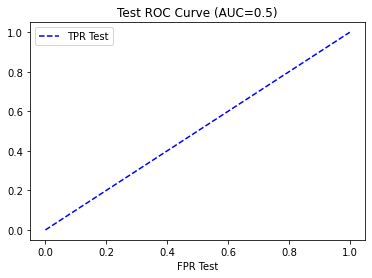

In [225]:
 roc_df_test_rnn.plot(
    x="FPR Test",
    y="TPR Test",
    color="blue",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test_rnn})",
)